In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (25, 16)
#plt.style.use('ggplot')


In [115]:
file = "data/cardio_clean_clustering_IMC.csv"
dataframe = pd.read_csv(file)
print(len(dataframe))
dataframe.head()

593


,Unnamed: 0,number,DIA,MES,AÑO,INICIO,TERMINO,gender,age,PESO,...,TIEMPO,mGy,pGym,IMÁGENES,CUADROS POR SEGUNDO,PULSOS POR SEGUNDO,CONSECUTIVO,CONTRASTE,IMC_categorico,Cluster No
0,0,1,1,3,2018,11:55,13:15,0,75,72.0,...,3.25,85.0,4209.9,3,7.5,15.0,6405,0,S,1
1,1,2,1,3,2018,19:00,20:00,0,49,78.0,...,7.60,1301.0,8858.6,18,7.5,15.0,6406,120,S,3
2,2,3,5,3,2018,17:00,19:00,1,78,60.0,...,10.04,128.0,6979.5,5,7.5,15.0,6407,0,N,1
3,3,4,6,3,2018,17:00,19:16,0,48,115.0,...,30.60,1906.0,22416.8,13,7.5,15.0,6410,230,O,2
4,4,5,7,3,2018,9:20,10:10,1,81,80.0,...,2.45,206.0,1026.5,11,7.5,15.0,6411,100,S,1


In [100]:
dataframe.describe()

,Unnamed: 0,number,DIA,MES,AÑO,gender,age,PESO,TALLA,BMI,...,NOCTURNO,TIEMPO,mGy,pGym,IMÁGENES,CUADROS POR SEGUNDO,PULSOS POR SEGUNDO,CONSECUTIVO,CONTRASTE,Cluster No
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,...,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000
mean,296.000000,297.000000,15.779089,6.387858,2018.153457,0.300169,61.494098,73.547218,1.709292,27.398877,...,0.030354,9.759039,792.592243,5532.830691,15.296796,7.604553,14.950253,6804.768971,87.895447,1.716695
std,171.328632,171.328632,8.145640,3.514639,0.360732,0.458718,13.431271,15.976687,1.783673,5.240618,...,0.171705,8.680986,819.603629,5163.235090,10.825689,1.196502,0.648260,230.643186,87.783782,0.937583
min,0.000000,1.000000,1.000000,1.000000,2018.000000,0.000000,11.000000,1.500000,1.060000,0.000741,...,0.000000,0.100000,1.000000,54.400000,0.000000,4.000000,3.000000,6405.000000,0.000000,1.000000
25%,148.000000,149.000000,9.000000,4.000000,2018.000000,0.000000,54.000000,63.000000,1.580000,24.128792,...,0.000000,4.000000,218.050000,1955.400000,9.000000,7.500000,15.000000,6605.000000,0.000000,1.000000
50%,296.000000,297.000000,16.000000,6.000000,2018.000000,0.000000,62.000000,72.000000,1.650000,27.055151,...,0.000000,7.000000,502.000000,3907.400000,13.000000,7.500000,15.000000,6814.000000,75.000000,1.000000
75%,444.000000,445.000000,23.000000,10.000000,2018.000000,1.000000,71.000000,83.000000,1.700000,29.721079,...,0.000000,12.900000,1124.000000,7569.700000,19.000000,7.500000,15.000000,7009.000000,130.000000,3.000000
max,592.000000,593.000000,31.000000,12.000000,2019.000000,1.000000,91.000000,135.000000,45.000000,60.000000,...,1.000000,52.700000,5233.000000,33878.800000,77.000000,15.000000,15.000000,7198.000000,450.000000,4.000000


In [101]:
print(dataframe.groupby('gender').size())

gender
0    415
1    178
dtype: int64


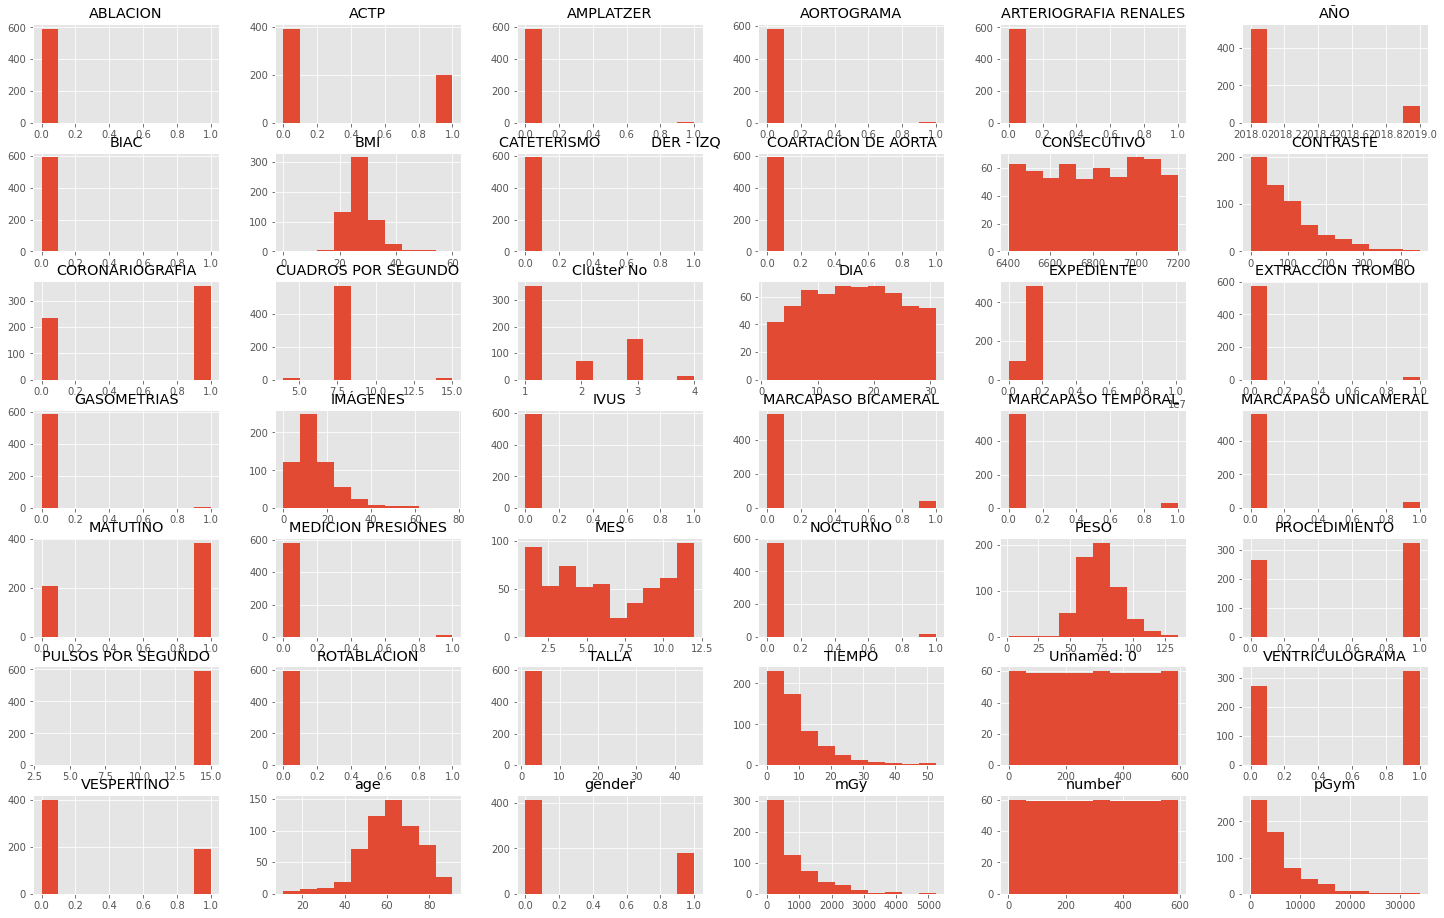

In [102]:
#dataframe.drop(['ABLACION', 'ACTP', 'AMPLATZER', 'AORTOGRAMA', 'ARTERIOGRAFIA RENALES', 'AÑO', 'CUADROS POR SEGUNDO'
#                'Cluster No', 'COARTACION DE AHORTA', 'CORONOGRAFIA', 'GASOMETRIAS', 'IVUS'], 1).hist()
dataframe.hist()
plt.show()

/home/isidro/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


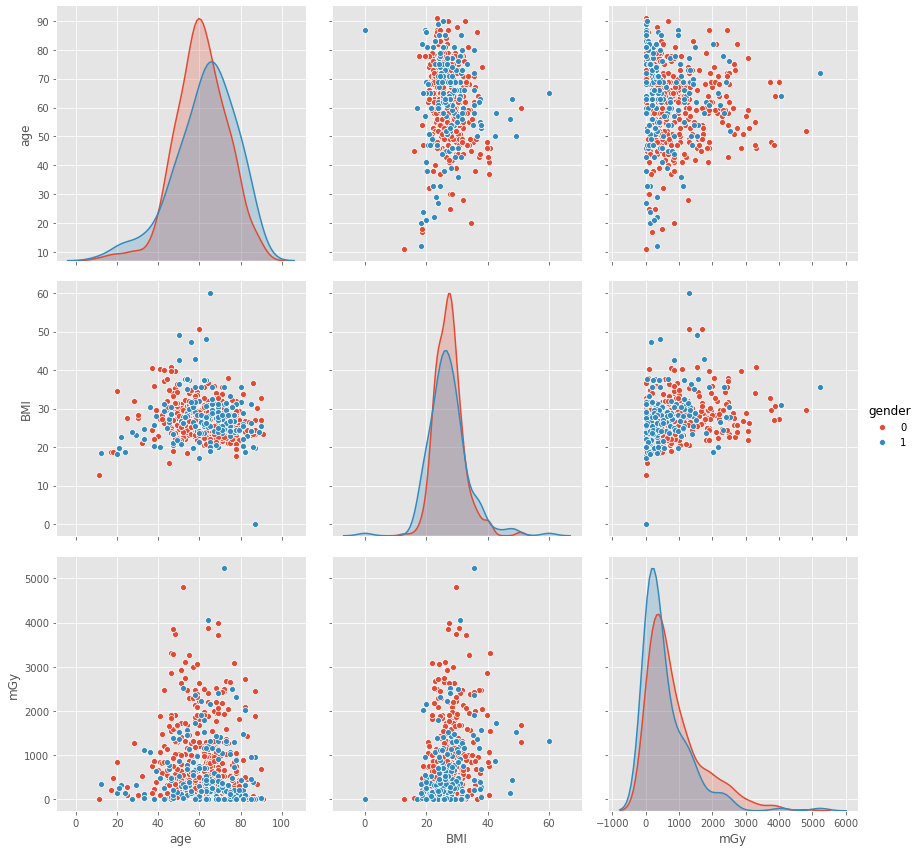

In [103]:
#sb.pairplot(dataframe.dropna(), hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')
sb.pairplot(dataframe, hue='gender',size=4,vars=["age","BMI",'mGy'],kind='scatter')
#plt.lables={}
plt.savefig("pairplot")

In [105]:
#Para el ejercicio, sólo seleccionamos 3 dimensiones, para poder graficarlo
# data = pd.read_csv(file, 
#                    usecols={'EDAD','PESO', 'TALLA', 'TIEMPO',
#                             'mGy','pGym', 'IMÁGENES'})
#X = np.array(dataframe[["IMC","TIEMPO","mGy", "pGym", "IMÁGENES"]])
X = np.array(dataframe[[ "age", "BMI", "mGy"]])
y = np.array(dataframe['gender'])
X.shape



(593, 3)

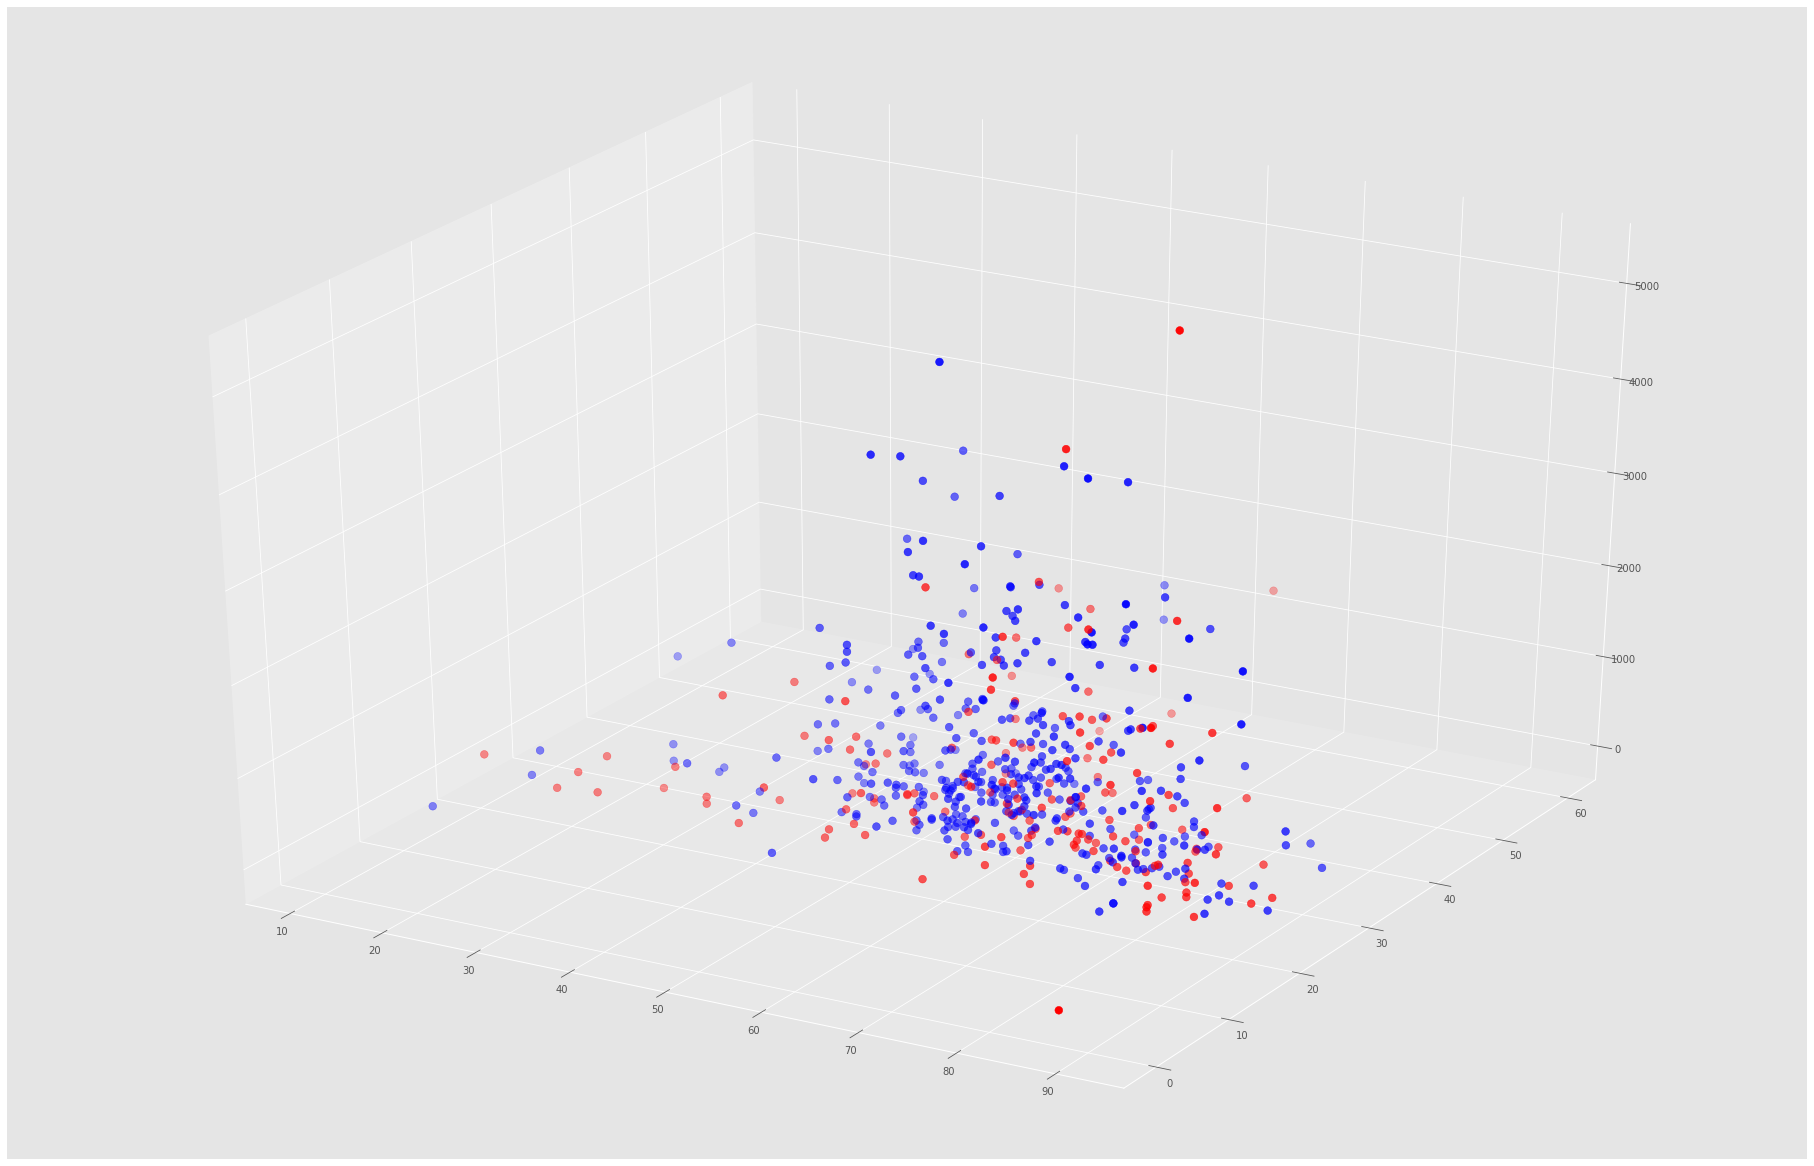

In [113]:
fig = plt.figure()
ax = Axes3D(fig)
#colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
colores=['blue','red','green']
#NOTA: asignamos la posición cero del array repetida pues las categorias comienzan en id 1. 
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)



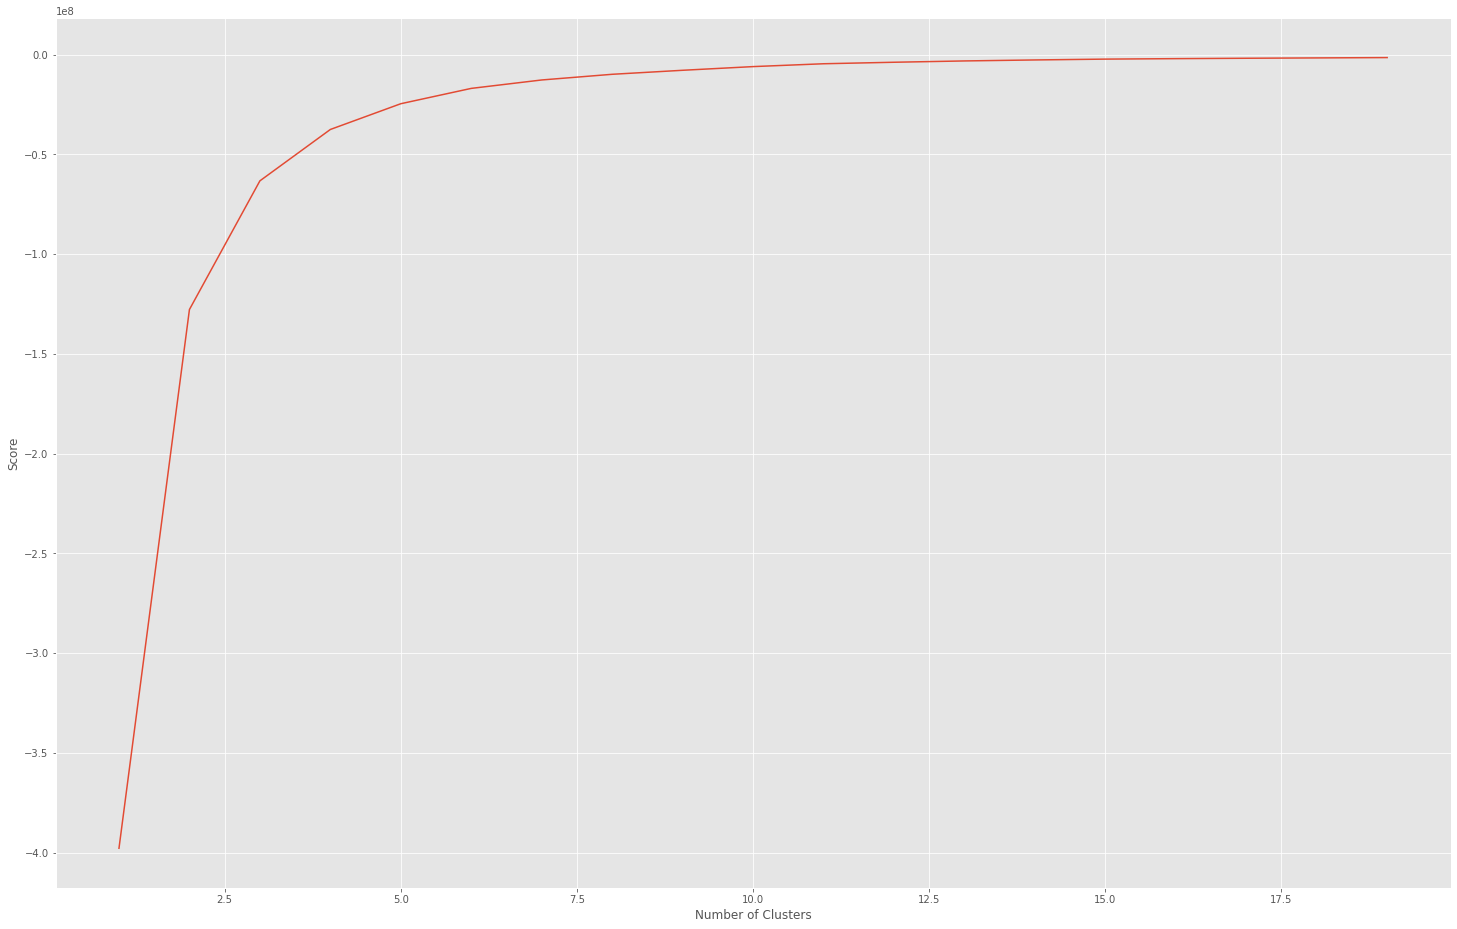

In [108]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.savefig("elbow")
#plt.title('Elbow Curve')
plt.show()



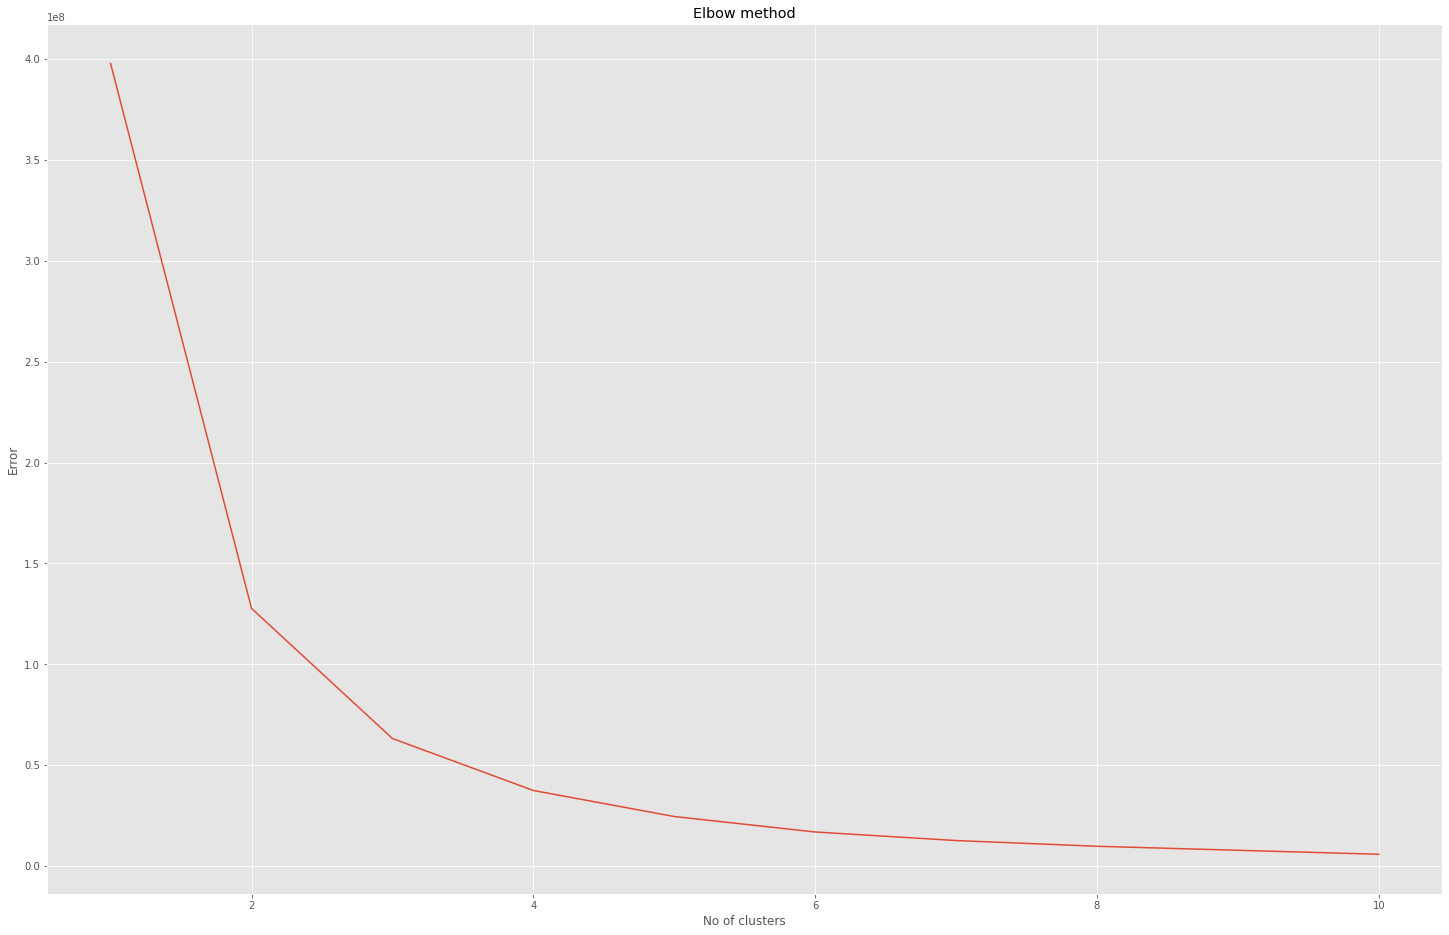

In [109]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.savefig("elbow")
plt.show()

In [116]:
# Para el ejercicio, elijo 5 como un buen valor de K. Pero podría ser otro.
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)



[[  62.34782609   29.01627548 2144.44927536]
 [  61.83753501   26.39445725  284.61176471]
 [  60.64900662   28.75333061 1073.63443709]
 [  58.125        30.05228862 3644.6875    ]]


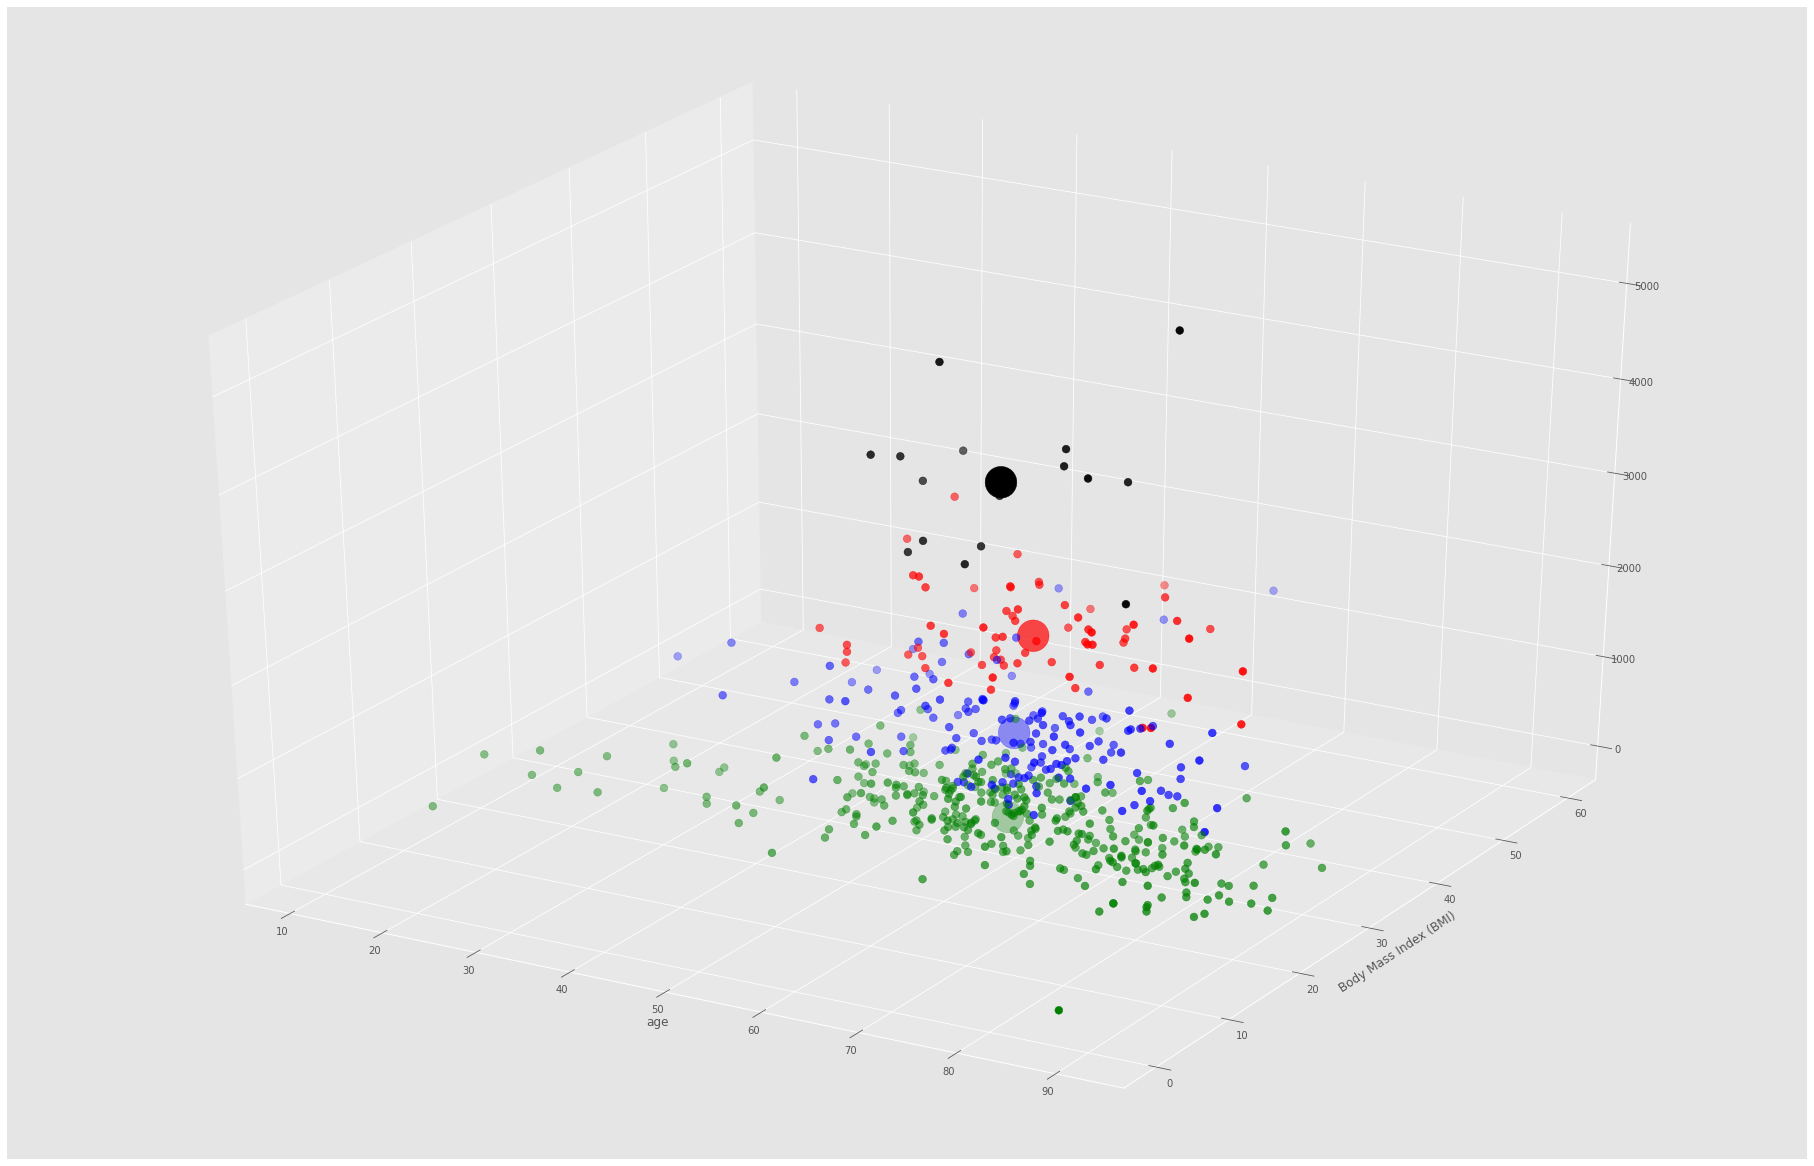

In [129]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(X)
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','blue','black']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='o', c=colores, s=1000)
plt.xlabel("age")
plt.ylabel("Body Mass Index (BMI)")
plt.savefig("3dclustering")

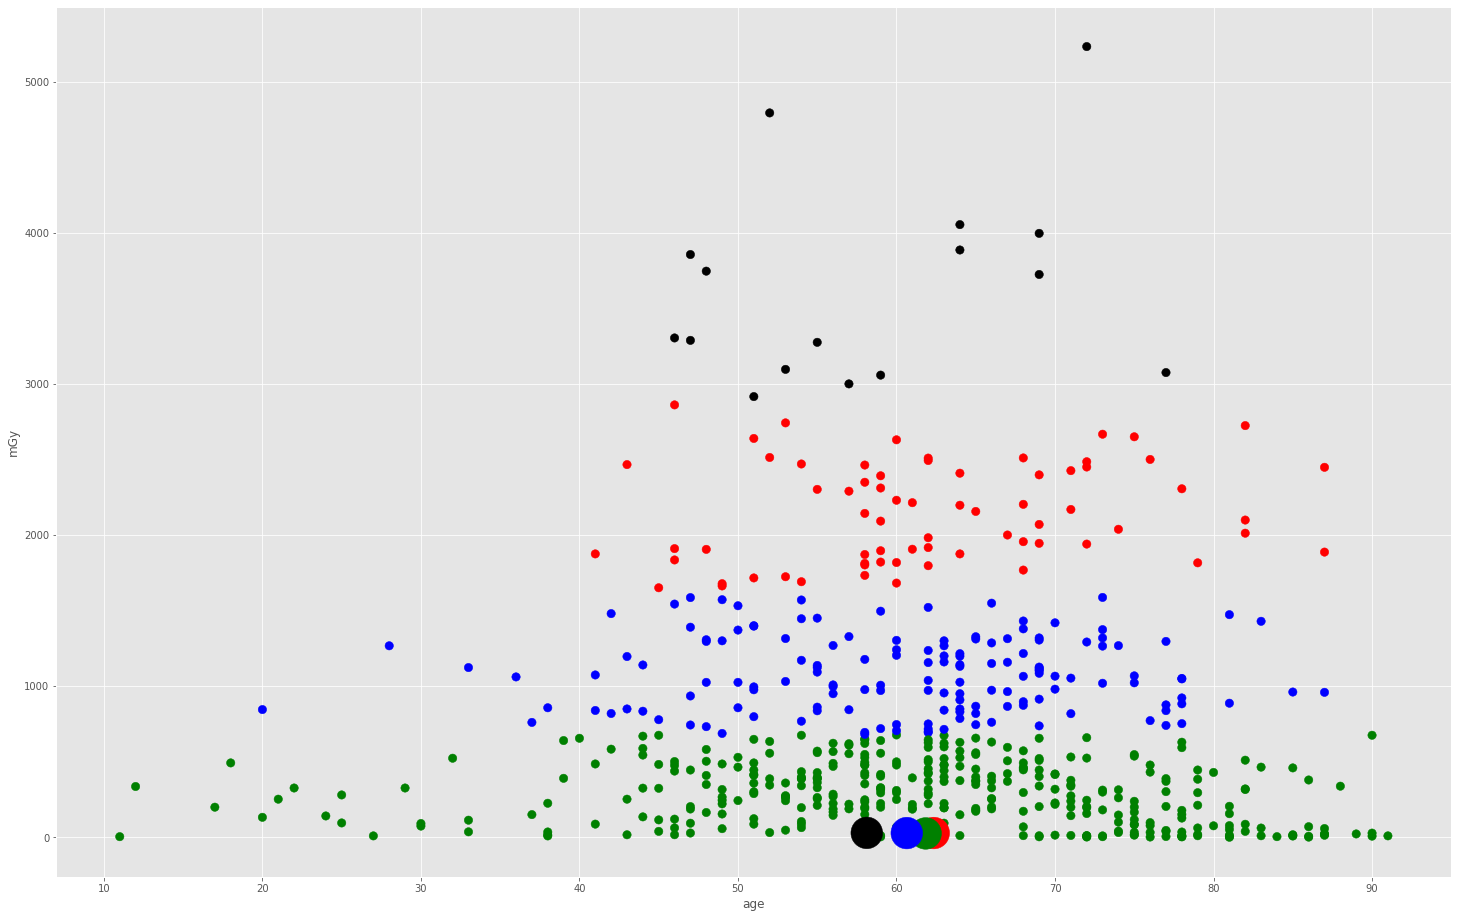

In [128]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = dataframe['age'].values
f2 = dataframe['mGy'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='o', c=colores, s=1000)
plt.xlabel("age")
plt.ylabel("mGy")
plt.savefig("agevsmGyprojection")

plt.show()

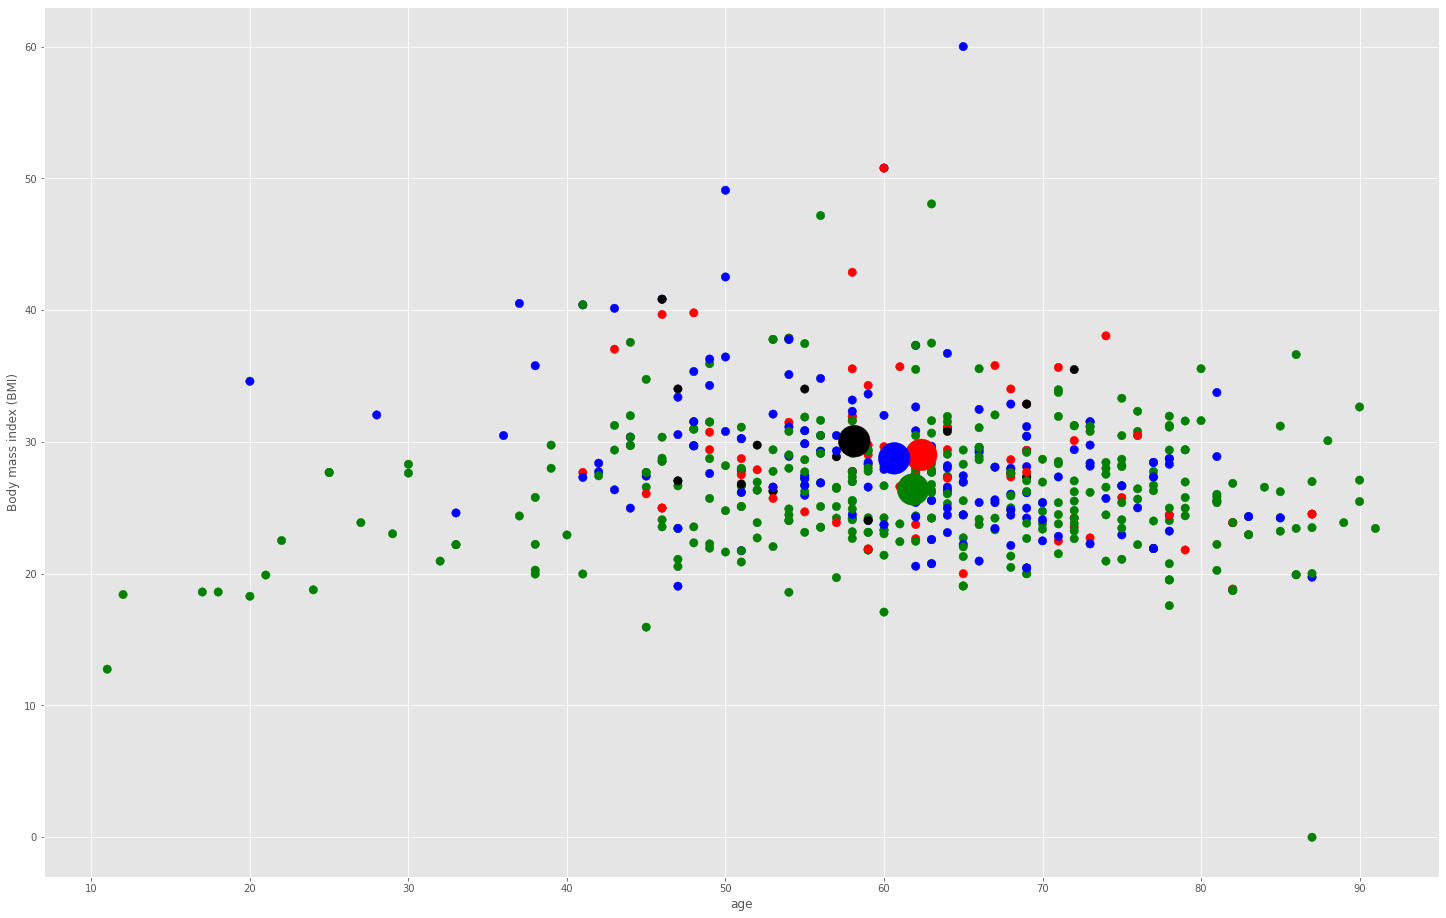

In [127]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = dataframe['age'].values
f2 = dataframe['BMI'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='o', c=colores, s=1000)
plt.xlabel("age")
plt.ylabel("Body mass index (BMI)")
plt.savefig("agevsBMIprojection")
plt.show()

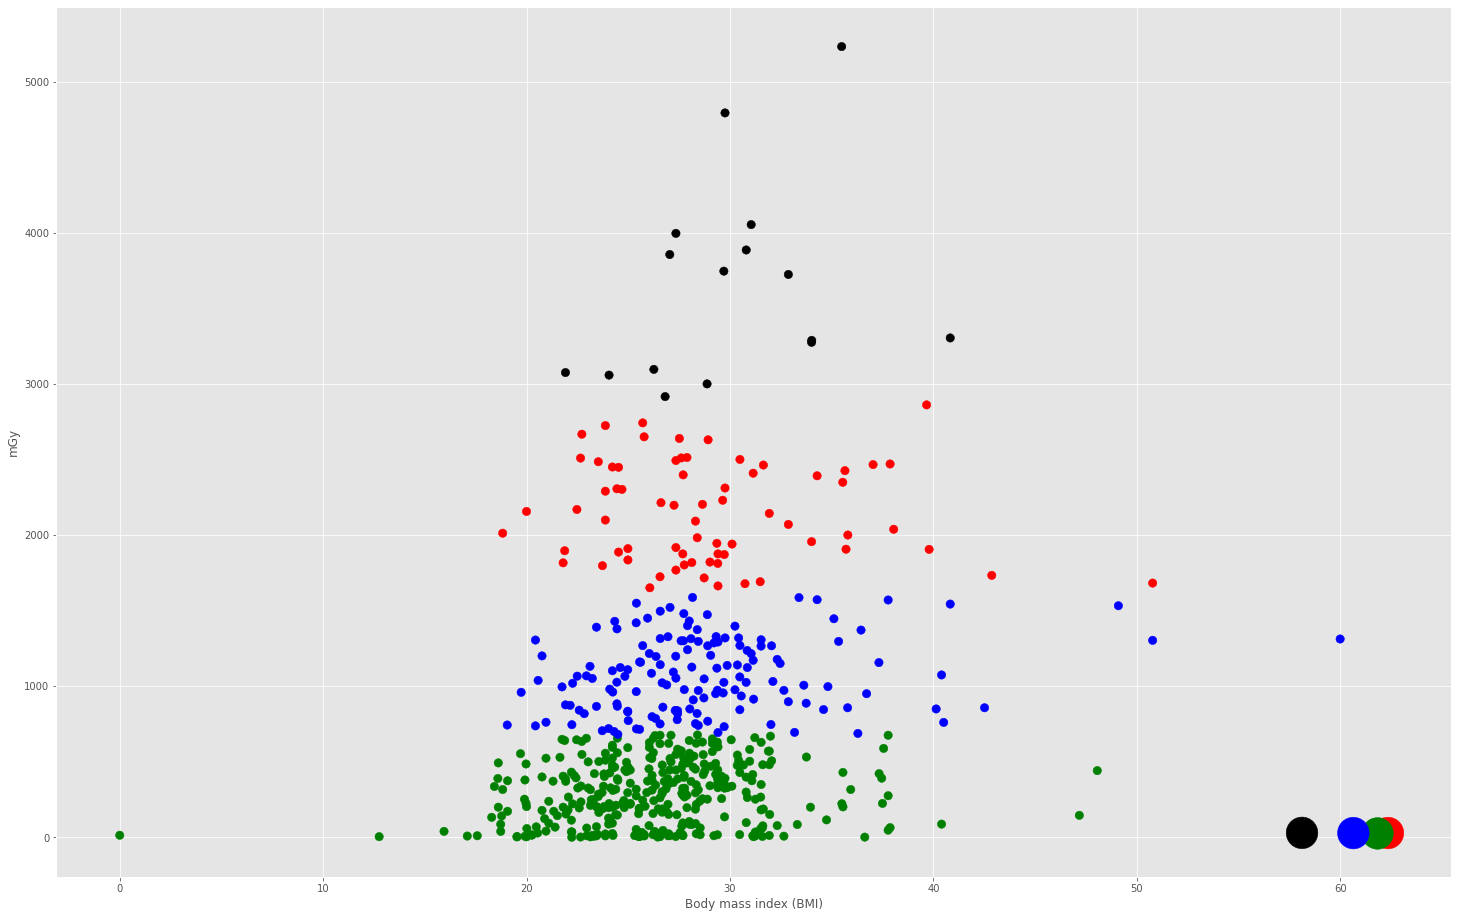

In [140]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = dataframe['BMI'].values
f2 = dataframe['mGy'].values
plt.ylabel("mGy")
plt.xlabel("Body mass index (BMI)")

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='o', c=colores, s=1000)
plt.savefig("bmivsmgyprojection")

plt.show()

In [132]:
# contamos cuantos usuarios hay en cada grupo
copy =  pd.DataFrame()
copy['number']=dataframe['number'].values
copy['gender']=dataframe['gender'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo



,color,cantidad
0,red,69
1,green,357
2,blue,151
3,black,16


In [133]:
dataframe['gender'].values

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,

In [135]:
# Veamos cuantos usuarios en cada categoria hay en el grupo 0
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['gender']=[0,1]
diversidadGrupo['cantidad']=group_referrals.groupby('gender').size()
diversidadGrupo

,gender,cantidad
0,0,58
1,1,11


In [136]:
# Veamos cuantos usuarios en cada categoria hay en el grupo 1
group_referrer_index = copy['label'] ==1
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['gender']=[0,1]
diversidadGrupo['cantidad']=group_referrals.groupby('gender').size()
diversidadGrupo

,gender,cantidad
0,0,233
1,1,124


In [138]:
# Veamos cuantos usuarios en cada categoria hay en el grupo 2
group_referrer_index = copy['label'] ==2
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['gender']=[0,1]
diversidadGrupo['cantidad']=group_referrals.groupby('gender').size()
diversidadGrupo

,gender,cantidad
0,0,110
1,1,41


In [139]:
# Veamos cuantos usuarios en cada categoria hay en el grupo 3
group_referrer_index = copy['label'] ==3
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['gender']=[0,1]
diversidadGrupo['cantidad']=group_referrals.groupby('gender').size()
diversidadGrupo

,gender,cantidad
0,0,14
1,1,2
